## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading Dataset

In [4]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


## Data Exploration

In [7]:
df.shape

(247, 14)

In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


As we have data of two different Regions we will create a new feature indiacting the region
- 0 : For Bejaia Region
- 1 : For Sidi-Bel Abbes Region

In [10]:
# Droping invalid row

invalid_rows = df[df['day'].str.contains('Region|day|month|year|Temperature', na=False)].index
df = df.drop(invalid_rows).reset_index(drop=True)

## Feature Creation

In [12]:
df.loc[:121,'Region'] = 0
df.loc[122:,'Region'] = 1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.8+ KB


## Creating new feature

In [15]:
df['Region'] = df['Region'].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


## Droping Null Values

In [17]:
df.isnull().sum()

day            1
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [18]:
df = df.dropna().reset_index(drop=True) # Droping Null values
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [19]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
df.shape

(243, 15)

## Correcting Names

In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [23]:
# Removing Empty Spaces
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Converting Datatypes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [28]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [29]:
objects = [feature for feature in df.columns if df[feature].dtype=='O']

for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [31]:
# Saving Clean Dataset
df.to_csv('Algerian_forest_fires_cleaned_data.csv', index=False)

# EDA - Exploratory Data Analysis

In [33]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
# Droping Unwanted Features
df.drop(['day','month','year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [36]:
# Encoding for feature Classes

# df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

df['Classes'] = np.where(df['Classes'].str.strip()=='not fire',0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


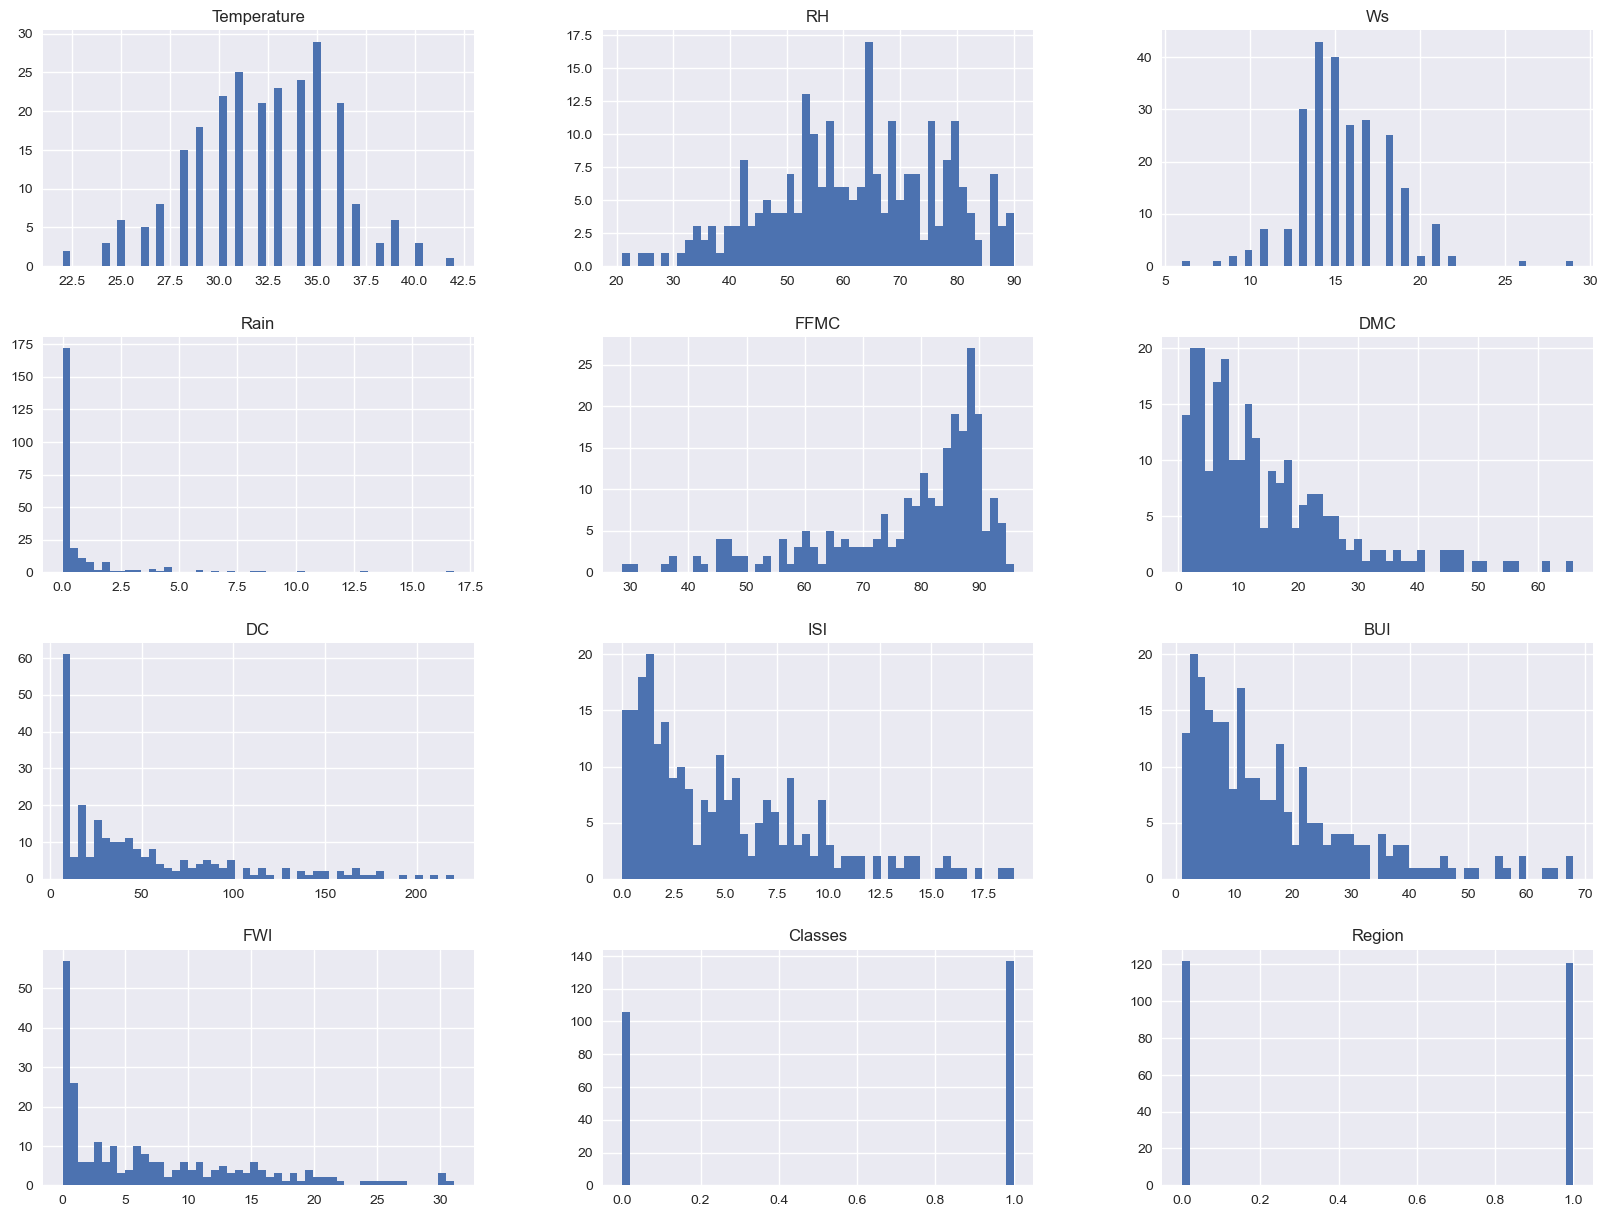

In [37]:
# plot density for all features
# plt.style.available

plt.style.use('seaborn-v0_8')
df.hist(bins=50, figsize=(20,15))
plt.show()

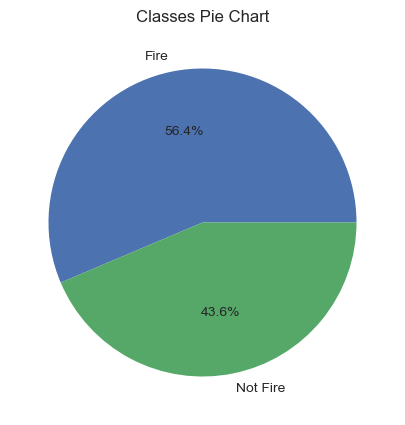

In [38]:
# Plotting Pie Chart

percent = df['Classes'].value_counts(normalize=True)*100
class_labels = ['Fire','Not Fire']

plt.figure(figsize=(10,5))
plt.title('Classes Pie Chart')
plt.pie(percent, labels=class_labels, autopct='%1.1f%%')
plt.show()

In [39]:
# Correlation

df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


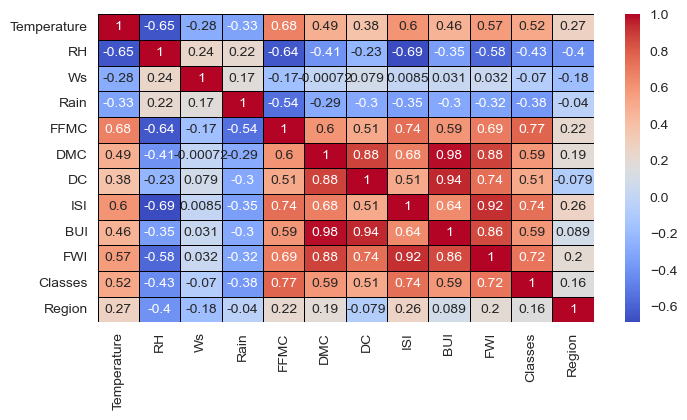

In [40]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='coolwarm',linecolor='black',linewidths=0.5, annot=True)
plt.show()

# Model Training
## Train Test Split

In [42]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [43]:
# Dependent and Independent Features
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [44]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [45]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [46]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f'Train Size : {X_train.shape,y_train.shape}')
print(f'Test Size : {X_test.shape,y_test.shape}')

Train Size : ((170, 11), (170,))
Test Size : ((73, 11), (73,))


## Feature Selection

In [48]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


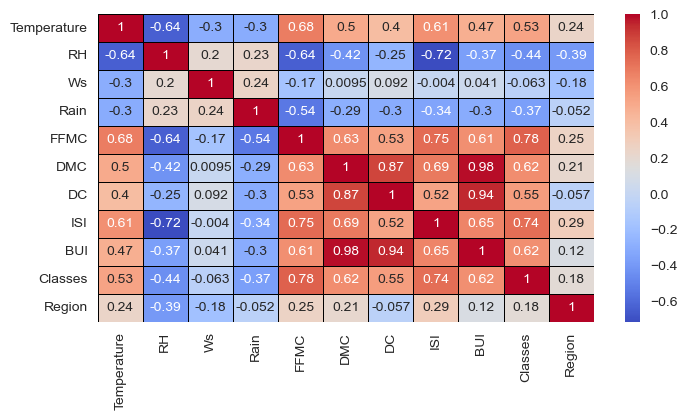

In [49]:
plt.figure(figsize=(8,4))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm',linewidths=0.5,linecolor='black')
plt.show()

In [50]:
# Function to detect Highly correlated features
def correlation(dataset, threshold):
    corr_col = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                corr_col.add(col_name)
    return corr_col

# Calling Function
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [51]:
# Droping Highly correlated features

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features, axis=1,inplace=True)

print(f'Train Size : {X_train.shape,y_train.shape}')
print(f'Test Size : {X_test.shape,y_test.shape}')

Train Size : ((170, 9), (170,))
Test Size : ((73, 9), (73,))


## Standardization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

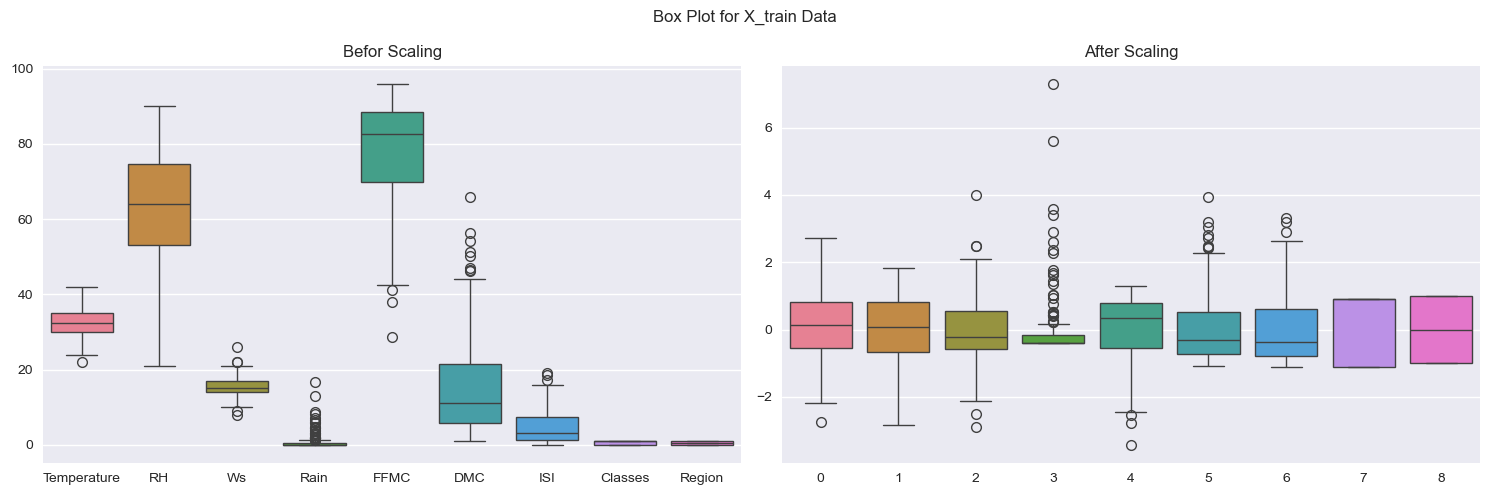

In [54]:
# Creating Box Plot for Visualization
plt.figure(figsize=(15,5))
plt.suptitle('Box Plot for X_train Data')

plt.subplot(1,2,1)
plt.title('Befor Scaling')
sns.boxplot(data=X_train)

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.boxplot(data=X_train_scaled)

plt.tight_layout()
plt.show()

## Linear Regression Model

MAE : 0.5648036371485071
MSE : 0.6829306792403733
RMSE : 0.8263961999188847
Accuracy : 0.9847206874554418


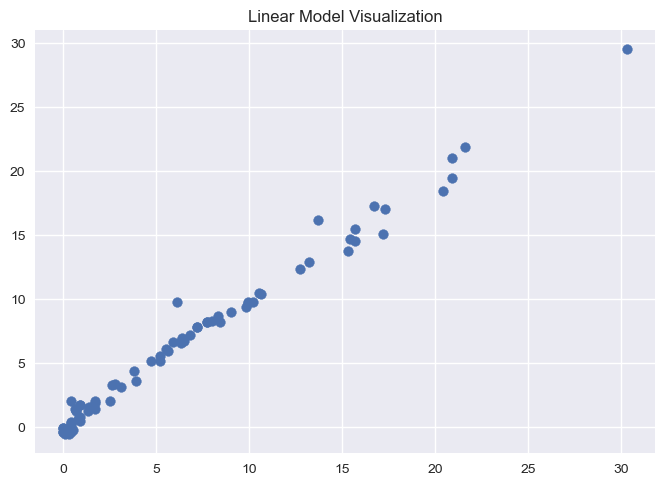

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Model CReation
lin_model = LinearRegression()
lin_model.fit(X_train_scaled,y_train)

# Model Prediction
y_pred = lin_model.predict(X_test_scaled)

# Performance Matrix
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = r2_score(y_test, y_pred)

print(f'MAE : {MAE}')
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'Accuracy : {score}')

# Visualizing Model
plt.title('Linear Model Visualization')
plt.scatter(y_test,y_pred)
plt.show()

## Lasso Regression

MAE : 1.1203368882393199
MSE : 2.1840267665734507
RMSE : 1.477845312126222
Accuracy : 0.9511364350928344


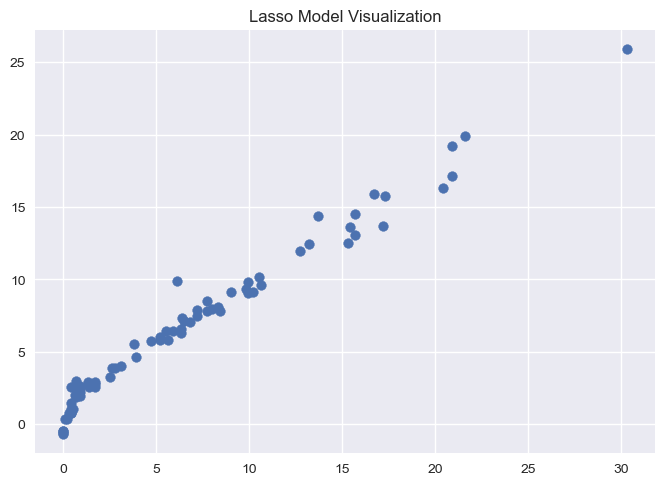

In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Model CReation
lasso_model = Lasso()
lasso_model.fit(X_train_scaled,y_train)

# Model Prediction
y_pred = lasso_model.predict(X_test_scaled)

# Performance Matrix
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = r2_score(y_test, y_pred)

print(f'MAE : {MAE}')
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'Accuracy : {score}')

# Visualizing Model
plt.title('Lasso Model Visualization')
plt.scatter(y_test,y_pred)
plt.show()

## LassoCv Regression

MAE : 0.6356015744517419
MSE : 0.7972605196410506
RMSE : 0.8928944616476522
Accuracy : 0.9821627684487946


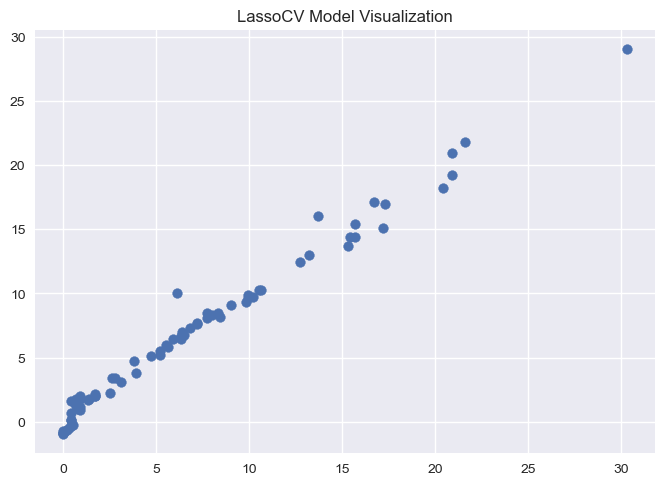

In [60]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Model CReation
lassocv_model = LassoCV(cv=5)
lassocv_model.fit(X_train_scaled,y_train)

# Model Prediction
y_pred = lassocv_model.predict(X_test_scaled)

# Performance Matrix
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = r2_score(y_test, y_pred)

print(f'MAE : {MAE}')
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'Accuracy : {score}')

# Visualizing Model
plt.title('LassoCV Model Visualization')
plt.scatter(y_test,y_pred)
plt.show()

## Ridge Regression

MAE : 0.5844876727578057
MSE : 0.7079451074397771
RMSE : 0.8413947393701586
Accuracy : 0.9841610358272455


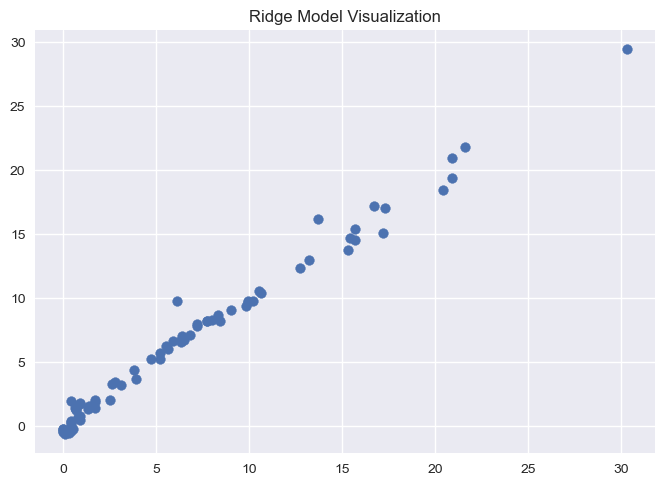

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model  Creation
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = ridge_model.predict(X_test_scaled)

# Performance Matrix
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = r2_score(y_test, y_pred)

print(f'MAE : {MAE}')
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'Accuracy : {score}')

# Visualizing Model
plt.title('Ridge Model Visualization')
plt.scatter(y_test,y_pred)
plt.show()

RidgeCV Regression

MAE : 0.7943132619521942
MSE : 1.0627383242719193
RMSE : 1.030892004174986
Accuracy : 0.9762231929195329


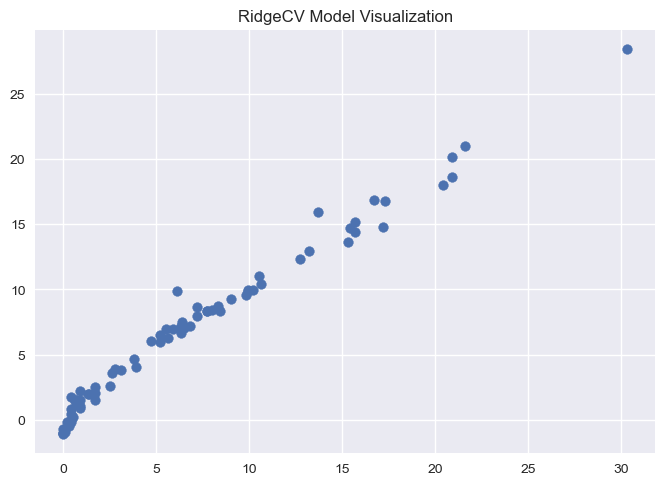

In [64]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model  Creation
ridgecv_model = RidgeCV(cv=5)
ridgecv_model.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = ridgecv_model.predict(X_test_scaled)

# Performance Matrix
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = r2_score(y_test, y_pred)

print(f'MAE : {MAE}')
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'Accuracy : {score}')

# Visualizing Model
plt.title('RidgeCV Model Visualization')
plt.scatter(y_test,y_pred)
plt.show()

## ElasticNet Regression

MAE : 1.8554687479717549
MSE : 5.345346375670645
RMSE : 2.312000513769546
Accuracy : 0.8804077479376988


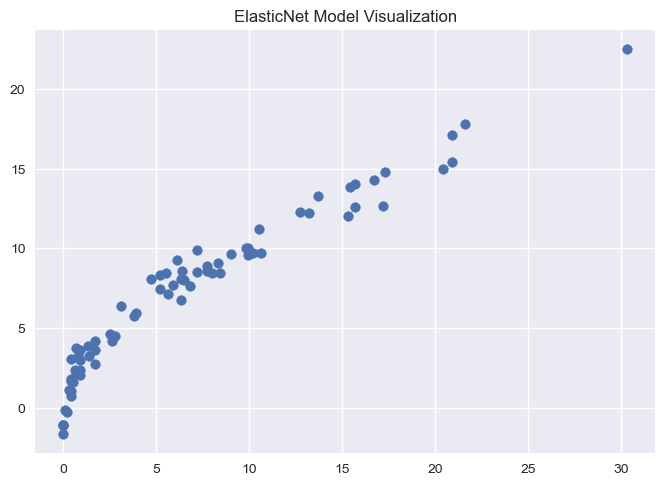

In [66]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model  Creation
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = elasticnet_model.predict(X_test_scaled)

# Performance Matrix
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = r2_score(y_test, y_pred)

print(f'MAE : {MAE}')
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'Accuracy : {score}')

# Visualizing Model
plt.title('ElasticNet Model Visualization')
plt.scatter(y_test,y_pred)
plt.show()

## ElasticNetCV Regression

MAE : 0.6856401038998683
MSE : 0.8608422455718344
RMSE : 0.9278158467992635
Accuracy : 0.9807402447693789


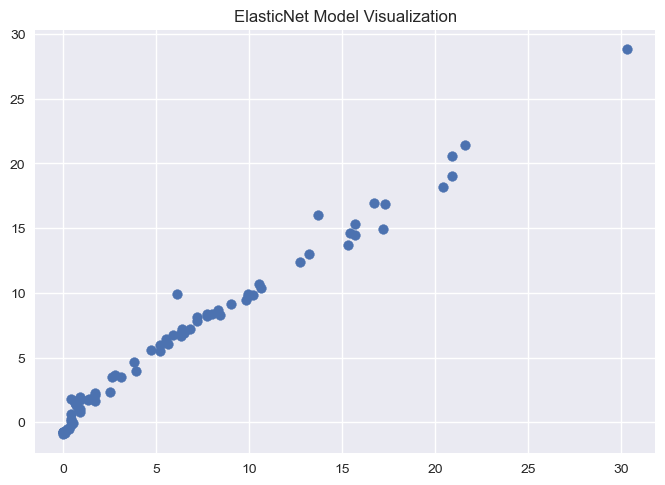

In [68]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model  Creation
elasticnetcv_model = ElasticNetCV(cv=5)
elasticnetcv_model.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = elasticnetcv_model.predict(X_test_scaled)

# Performance Matrix
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = r2_score(y_test, y_pred)

print(f'MAE : {MAE}')
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'Accuracy : {score}')

# Visualizing Model
plt.title('ElasticNet Model Visualization')
plt.scatter(y_test,y_pred)
plt.show()

### Amoung all of the ML Modls Linear Regression is giving highest Accuracy i.e. ***0.9847206874554418***

## Pickling the ML Model & Preprocessing Model StandardScaler

In [71]:
scaler

StandardScaler()

In [72]:
lin_model

LinearRegression()

In [73]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lin_model, open('Linear_model.pkl','wb'))